In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file_1 = ROOT.TFile.Open("run3B_NE_305stop.root")
hist_1 = ROOT.TH1D()
hcov_1 = ROOT.TH2D()
hist_1 = file_1.Get("calo_histogram_sum_ratio")
hcov_1 = file_1.Get("hcov")
file_2 = ROOT.TFile.Open("run3C_NE_305stop.root")
hist_2 = ROOT.TH1D()
hcov_2 = ROOT.TH2D()
hist_2 = file_2.Get("calo_histogram_sum_ratio")
hcov_2 = file_2.Get("hcov")
file_3 = ROOT.TFile.Open("run3D_NE_305stop.root")
hist_3 = ROOT.TH1D()
hcov_3 = ROOT.TH2D()
hist_3 = file_3.Get("calo_histogram_sum_ratio")
hcov_3 = file_3.Get("hcov")
file_4 = ROOT.TFile.Open("run3E_NE_305stop.root")
hist_4 = ROOT.TH1D()
hcov_4 = ROOT.TH2D()
hist_4 = file_4.Get("calo_histogram_sum_ratio")
hcov_4 = file_4.Get("hcov")
file_5 = ROOT.TFile.Open("run3F_NE_305stop.root")
hist_5 = ROOT.TH1D()
hcov_5 = ROOT.TH2D()
hist_5 = file_5.Get("calo_histogram_sum_ratio")
hcov_5 = file_5.Get("hcov")
file_6 = ROOT.TFile.Open("run3G_NE_305stop.root")
hist_6 = ROOT.TH1D()
hcov_6 = ROOT.TH2D()
hist_6 = file_6.Get("calo_histogram_sum_ratio")
hcov_6 = file_6.Get("hcov")
file_7 = ROOT.TFile.Open("run3I_NE_305stop.root")
hist_7 = ROOT.TH1D()
hcov_7 = ROOT.TH2D()
hist_7 = file_7.Get("calo_histogram_sum_ratio")
hcov_7 = file_7.Get("hcov")
file_8 = ROOT.TFile.Open("run3J_NE_305stop.root")
hist_8 = ROOT.TH1D()
hcov_8 = ROOT.TH2D()
hist_8 = file_8.Get("calo_histogram_sum_ratio")
hcov_8 = file_8.Get("hcov")
file_9 = ROOT.TFile.Open("run3K_NE_305stop.root")
hist_9 = ROOT.TH1D()
hcov_9 = ROOT.TH2D()
hist_9 = file_9.Get("calo_histogram_sum_ratio")
hcov_9 = file_9.Get("hcov")
file_10 = ROOT.TFile.Open("run3L_NE_305stop.root")
hist_10 = ROOT.TH1D()
hcov_10 = ROOT.TH2D()
hist_10 = file_10.Get("calo_histogram_sum_ratio")
hcov_10 = file_10.Get("hcov")
file_11 = ROOT.TFile.Open("run3M_NE_305stop.root")
hist_11 = ROOT.TH1D()
hcov_11 = ROOT.TH2D()
hist_11 = file_11.Get("calo_histogram_sum_ratio")
hcov_11 = file_11.Get("hcov")
file_12 = ROOT.TFile.Open("run3N_NE_305stop.root")
hist_12 = ROOT.TH1D()
hcov_12 = ROOT.TH2D()
hist_12 = file_12.Get("calo_histogram_sum_ratio")
hcov_12 = file_12.Get("hcov")
file_13 = ROOT.TFile.Open("run3O_NE_305stop.root")
hist_13 = ROOT.TH1D()
hcov_13 = ROOT.TH2D()
hist_13 = file_13.Get("calo_histogram_sum_ratio")
hcov_13 = file_13.Get("hcov")

In [3]:
fit_start=30000
fit_stop=305000
fit_range=hist_1.FindBin(fit_stop)-hist_1.FindBin(fit_start)+1
y_val=np.empty(shape=(13,fit_range))
y_err=np.empty(shape=(13,fit_range))
x_val=np.empty(shape=(13,fit_range))
y_cov=np.empty(shape=(13,fit_range,fit_range))  

In [4]:
%%time
for ibin in range (0,fit_range):
    y_val[0][ibin]=hist_1.GetBinContent(ibin+hist_1.FindBin(fit_start))
    y_err[0][ibin]=hist_1.GetBinError(ibin+hist_1.FindBin(fit_start))
    x_val[0][ibin]=hist_1.GetBinCenter(ibin+hist_1.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[0][irow][icol]=hcov_1.GetBinContent(irow+hist_1.FindBin(fit_start),icol+hist_1.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[1][ibin]=hist_2.GetBinContent(ibin+hist_2.FindBin(fit_start))
    y_err[1][ibin]=hist_2.GetBinError(ibin+hist_2.FindBin(fit_start))
    x_val[1][ibin]=hist_2.GetBinCenter(ibin+hist_2.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[1][irow][icol]=hcov_2.GetBinContent(irow+hist_2.FindBin(fit_start),icol+hist_2.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[2][ibin]=hist_3.GetBinContent(ibin+hist_3.FindBin(fit_start))
    y_err[2][ibin]=hist_3.GetBinError(ibin+hist_3.FindBin(fit_start))
    x_val[2][ibin]=hist_3.GetBinCenter(ibin+hist_3.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[2][irow][icol]=hcov_3.GetBinContent(irow+hist_3.FindBin(fit_start),icol+hist_3.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[3][ibin]=hist_4.GetBinContent(ibin+hist_4.FindBin(fit_start))
    y_err[3][ibin]=hist_4.GetBinError(ibin+hist_4.FindBin(fit_start))
    x_val[3][ibin]=hist_4.GetBinCenter(ibin+hist_4.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[3][irow][icol]=hcov_4.GetBinContent(irow+hist_4.FindBin(fit_start),icol+hist_4.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[4][ibin]=hist_5.GetBinContent(ibin+hist_5.FindBin(fit_start))
    y_err[4][ibin]=hist_5.GetBinError(ibin+hist_5.FindBin(fit_start))
    x_val[4][ibin]=hist_5.GetBinCenter(ibin+hist_5.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[4][irow][icol]=hcov_5.GetBinContent(irow+hist_5.FindBin(fit_start),icol+hist_5.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[5][ibin]=hist_6.GetBinContent(ibin+hist_6.FindBin(fit_start))
    y_err[5][ibin]=hist_6.GetBinError(ibin+hist_6.FindBin(fit_start))
    x_val[5][ibin]=hist_6.GetBinCenter(ibin+hist_6.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[5][irow][icol]=hcov_6.GetBinContent(irow+hist_6.FindBin(fit_start),icol+hist_6.FindBin(fit_start))


for ibin in range (0,fit_range):
    y_val[6][ibin]=hist_7.GetBinContent(ibin+hist_7.FindBin(fit_start))
    y_err[6][ibin]=hist_7.GetBinError(ibin+hist_7.FindBin(fit_start))
    x_val[6][ibin]=hist_7.GetBinCenter(ibin+hist_7.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[6][irow][icol]=hcov_7.GetBinContent(irow+hist_7.FindBin(fit_start),icol+hist_7.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[7][ibin]=hist_8.GetBinContent(ibin+hist_8.FindBin(fit_start))
    y_err[7][ibin]=hist_8.GetBinError(ibin+hist_8.FindBin(fit_start))
    x_val[7][ibin]=hist_8.GetBinCenter(ibin+hist_8.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[7][irow][icol]=hcov_8.GetBinContent(irow+hist_8.FindBin(fit_start),icol+hist_8.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[8][ibin]=hist_9.GetBinContent(ibin+hist_9.FindBin(fit_start))
    y_err[8][ibin]=hist_9.GetBinError(ibin+hist_9.FindBin(fit_start))
    x_val[8][ibin]=hist_9.GetBinCenter(ibin+hist_9.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[8][irow][icol]=hcov_9.GetBinContent(irow+hist_9.FindBin(fit_start),icol+hist_9.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[9][ibin]=hist_10.GetBinContent(ibin+hist_10.FindBin(fit_start))
    y_err[9][ibin]=hist_10.GetBinError(ibin+hist_10.FindBin(fit_start))
    x_val[9][ibin]=hist_10.GetBinCenter(ibin+hist_10.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[9][irow][icol]=hcov_10.GetBinContent(irow+hist_10.FindBin(fit_start),icol+hist_10.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[10][ibin]=hist_11.GetBinContent(ibin+hist_11.FindBin(fit_start))
    y_err[10][ibin]=hist_11.GetBinError(ibin+hist_11.FindBin(fit_start))
    x_val[10][ibin]=hist_11.GetBinCenter(ibin+hist_11.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[10][irow][icol]=hcov_11.GetBinContent(irow+hist_11.FindBin(fit_start),icol+hist_11.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[11][ibin]=hist_12.GetBinContent(ibin+hist_12.FindBin(fit_start))
    y_err[11][ibin]=hist_12.GetBinError(ibin+hist_12.FindBin(fit_start))
    x_val[11][ibin]=hist_12.GetBinCenter(ibin+hist_12.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[11][irow][icol]=hcov_12.GetBinContent(irow+hist_12.FindBin(fit_start),icol+hist_12.FindBin(fit_start))
        
        
for ibin in range (0,fit_range):
    y_val[12][ibin]=hist_13.GetBinContent(ibin+hist_13.FindBin(fit_start))
    y_err[12][ibin]=hist_13.GetBinError(ibin+hist_13.FindBin(fit_start))
    x_val[12][ibin]=hist_13.GetBinCenter(ibin+hist_13.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[12][irow][icol]=hcov_13.GetBinContent(irow+hist_13.FindBin(fit_start),icol+hist_13.FindBin(fit_start))

CPU times: user 1min 25s, sys: 19.5 s, total: 1min 45s
Wall time: 1min 45s


In [5]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [6]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist_2.GetBinWidth(1))
T_a=2*nbinshift*hist_2.GetBinWidth(1)

asym=np.empty(13)
dasym=np.empty(13)
rval=np.empty(13)
drval=np.empty(13)
phi=np.empty(13)
dphi=np.empty(13)
A_cbo=np.empty(13)
dA_cbo=np.empty(13)
tau_cbo=np.empty(13)
dtau_cbo=np.empty(13)
omega_cbo=np.empty(13)
domega_cbo=np.empty(13)
phi_cbo=np.empty(13)
dphi_cbo=np.empty(13)
A_cbo_A=np.empty(13)
dA_cbo_A=np.empty(13)
phi_cbo_A=np.empty(13)
dphi_cbo_A=np.empty(13)
A_cbo_phi=np.empty(13)
dA_cbo_phi=np.empty(13)
phi_cbo_phi=np.empty(13)
dphi_cbo_phi=np.empty(13)
A_vw=np.empty(13)
dA_vw=np.empty(13)
tau_vw=np.empty(13)
dtau_vw=np.empty(13)
omega_vw=np.empty(13)
domega_vw=np.empty(13)
phi_vw=np.empty(13)
dphi_vw=np.empty(13)
A_y=np.empty(13)
dA_y=np.empty(13)
tau_y=np.empty(13)
dtau_y=np.empty(13)
omega_y=np.empty(13)
domega_y=np.empty(13)
phi_y=np.empty(13)
dphi_y=np.empty(13)
A_2cbo=np.empty(13)
dA_2cbo=np.empty(13)
tau_2cbo=np.empty(13)
dtau_2cbo=np.empty(13)
omega_2cbo=np.empty(13)
domega_2cbo=np.empty(13)
phi_2cbo=np.empty(13)
dphi_2cbo=np.empty(13)
A_cbot=np.empty(13)
dA_cbot=np.empty(13)
calonum=np.empty(13)
red_chi2=np.empty(13)


In [7]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [8]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [9]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [10]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [14]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 85337
    omega_vw = 0.013891

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [15]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 85337
    omega_vw = 0.013891
    
    tau_vbo = 15470
    omega_vbo = 0.014099

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [16]:
def fit_func24(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               A_cbot = 0.0)-> np.double:
    
    
    tau_vw = 85337
    omega_vw = 0.013891
    
    tau_vbo = 15470
    omega_vbo = 0.014099
    
    tau_cbot= 24200
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_A))
    
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_phi))
    
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [17]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [18]:
%%time
for icalo in range(0,13): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.02,
             228960,
             0.002329,
             0.5]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.02,
              1.1,
              0.003,
              1.2]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])
    
    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.001,
              0.3]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])

    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              0.0005,
              3.5]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])

    p_init23=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              0.001,
              4.2]
    
    pars23, cov23 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_err[icalo])
    
    p_init24=[pars23[0],
              pars23[1],
              pars23[2],
              pars23[3],
              pars23[4],
              pars23[5],
              pars23[6],
              pars23[7],
              pars23[8],
              pars23[9],
              pars23[10],
              pars23[11],
              pars23[12],
              pars23[13],
              pars23[14],
              pars23[15],
              pars23[16],
              #-0.002
              0.006]
              #16400]
    
    pars24, cov24 = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init24, sigma=y_err[icalo])


    p_init_final=pars24
    
    pars2, cov_final = opt.curve_fit(f=fit_func24, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func24(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func24(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]
    A_cbot[icalo]=pars2[17]    
    dA_cbot[icalo]=stdevs[17]

CPU times: user 1min 57s, sys: 25.5 s, total: 2min 22s
Wall time: 1min 21s


In [19]:
stdevs

array([1.63424141e-05, 9.06742547e-01, 1.38230381e-04, 4.75504540e-05,
       2.97058129e+04, 1.27747134e-06, 1.77571593e-01, 1.43373808e-04,
       5.01521756e-01, 1.44047087e-04, 8.44583943e-01, 3.06948861e-05,
       1.41042420e+00, 3.15570483e-05, 7.60387377e-02, 2.73539381e-04,
       6.24460690e-02, 7.93466491e-03])

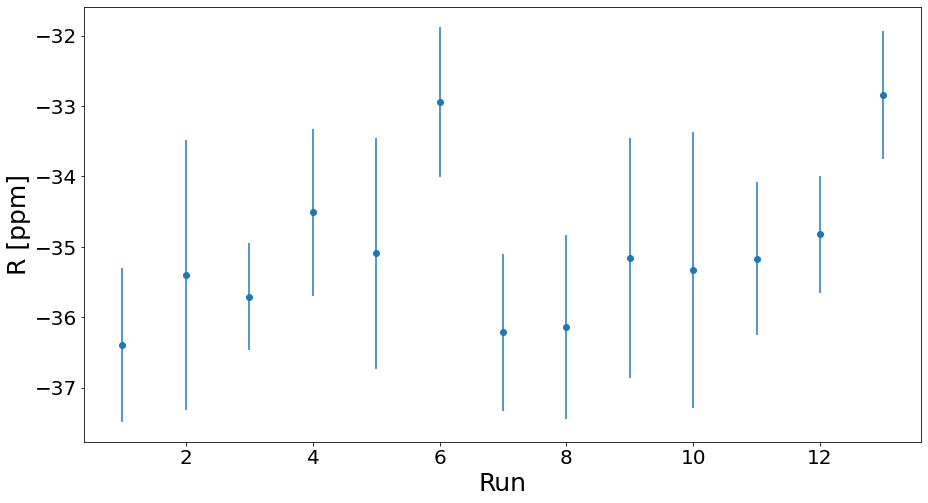

In [20]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run2_caloscan_R.jpg')

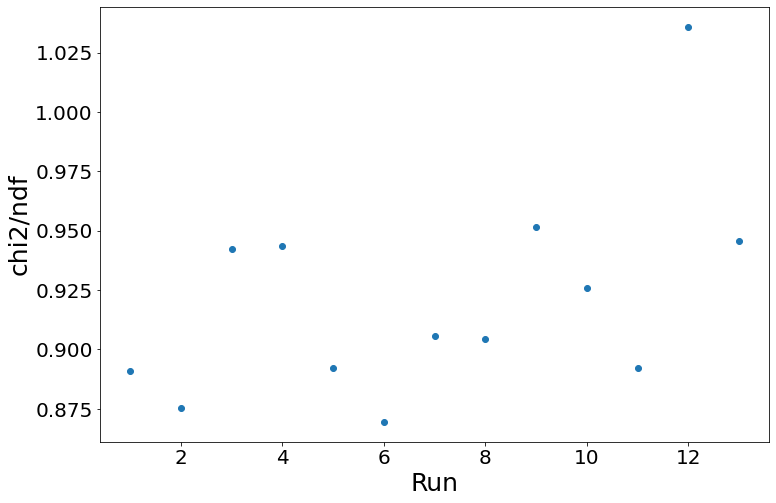

In [21]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, red_chi2, yerr=0, fmt="o")
plt.xlabel('Run',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.show()

In [22]:
rval

array([-36.39224617, -35.39647869, -35.70532849, -34.50858537,
       -35.08880677, -32.94078381, -36.2136218 , -36.13719445,
       -35.15585919, -35.32800085, -35.17006719, -34.82120514,
       -32.84050198])

In [23]:
drval

array([1.09557947, 1.91868024, 0.76138309, 1.18862915, 1.63981951,
       1.06797162, 1.11878691, 1.30728789, 1.70518752, 1.96568616,
       1.08672462, 0.82780118, 0.90674255])

In [24]:
red_chi2

array([0.89080165, 0.87533709, 0.94208705, 0.94358042, 0.89218895,
       0.86941119, 0.90562635, 0.90432445, 0.95167898, 0.92569625,
       0.89213469, 1.03594169, 0.94574086])

In [25]:
dataset=["3B","3C","3D","3E","3F","3G","3I","3J","3K","3L","3M","3N","3O"]

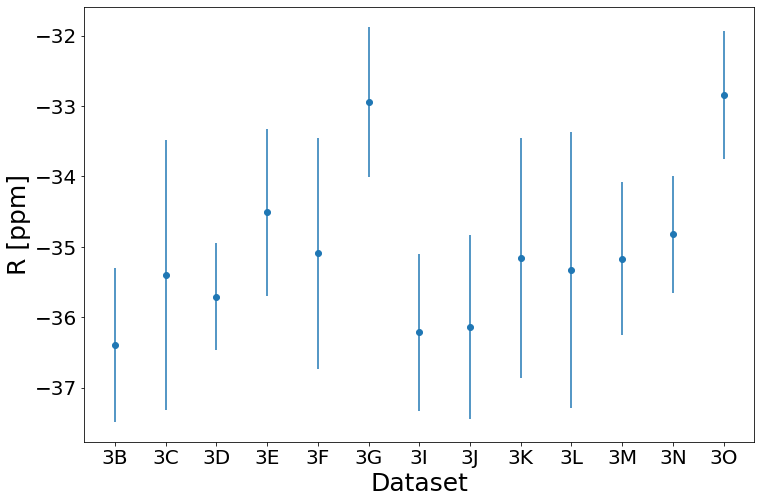

In [26]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(dataset, rval, yerr=drval, fmt="o")
plt.xlabel('Dataset',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()

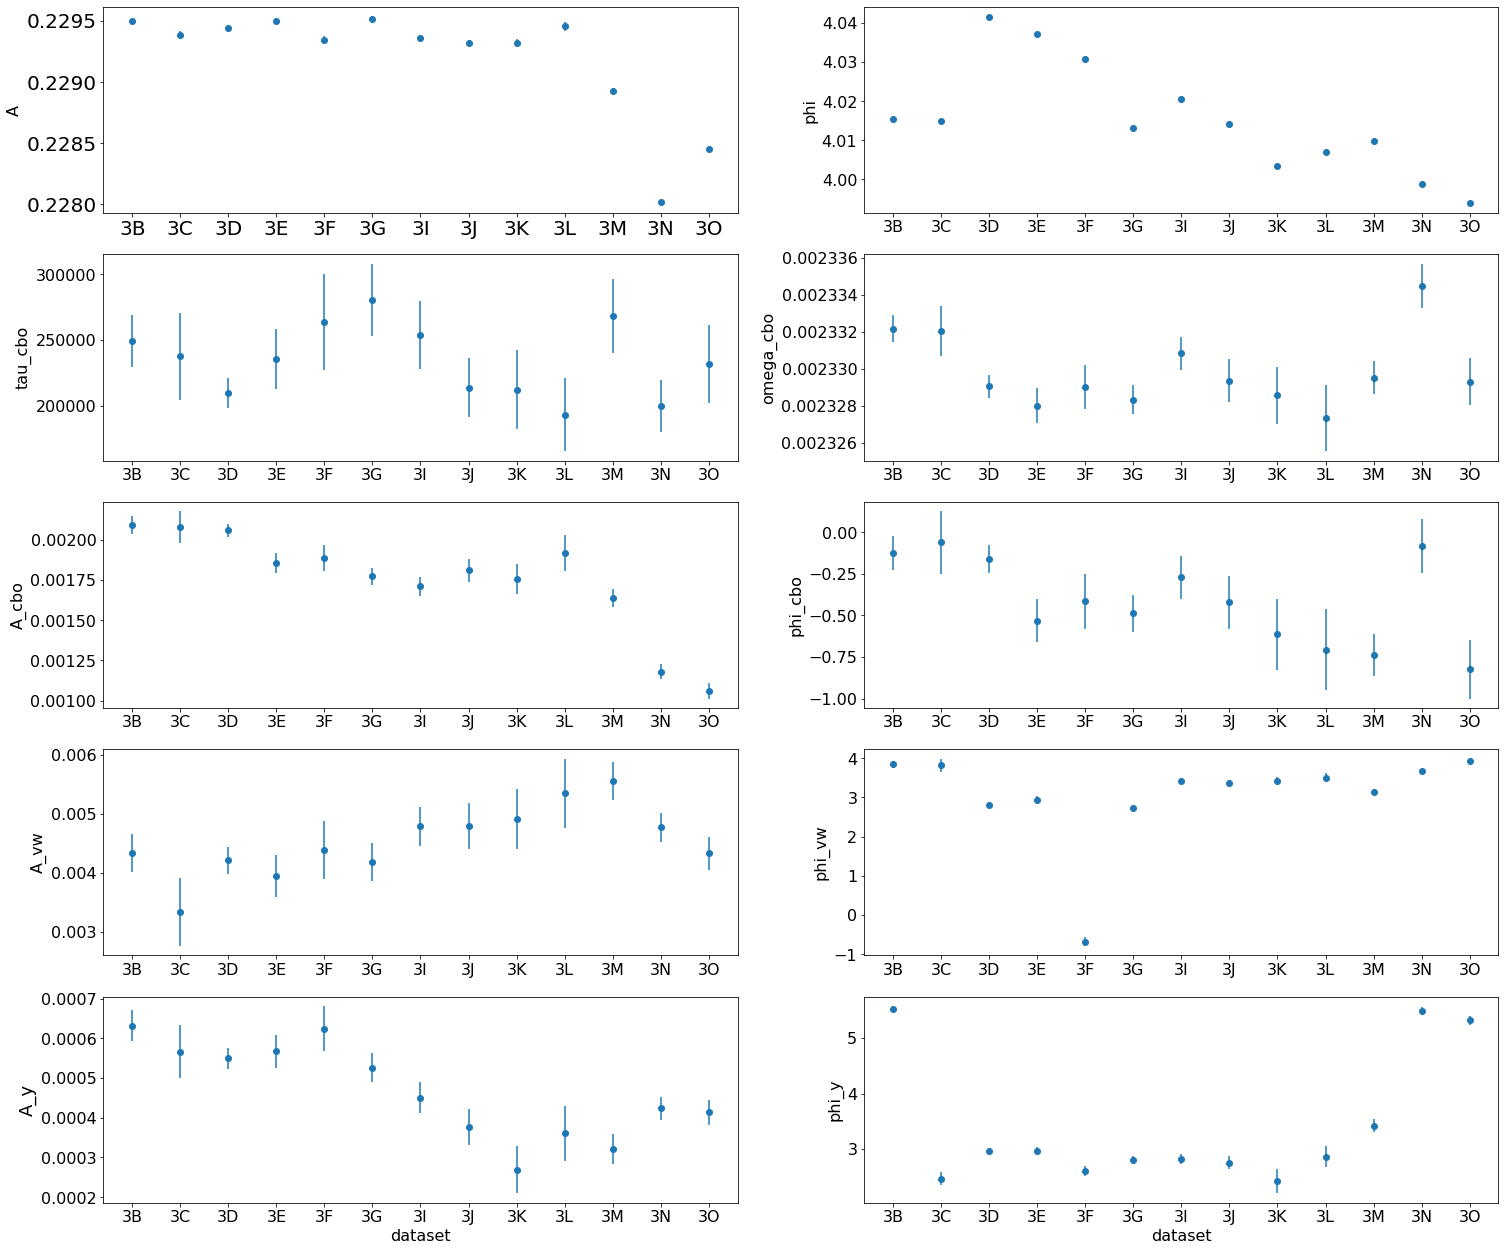

In [27]:
plt.figure(figsize=(25,22))

ax1 = plt.subplot2grid((5,2), (0,0))
# fist line:
#plt.subplot(521)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax2 = plt.subplot2grid((5,2), (0,1))
#plt.subplot(522)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi, yerr=dphi, fmt="o")
#plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax3 = plt.subplot2grid((5,2), (1,0))
#plt.subplot(523)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel('tau_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False
 
ax4 = plt.subplot2grid((5,2), (1,1))
#plt.subplot(524)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, omega_cbo, yerr=domega_cbo, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('omega_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax5 = plt.subplot2grid((5,2), (2,0))
#plt.subplot(525)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, A_cbo, yerr=dA_cbo, fmt="o")
plt.ylabel('A_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax6 = plt.subplot2grid((5,2), (2,1))
#plt.subplot(526)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_cbo, yerr=dphi_cbo, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax7 = plt.subplot2grid((5,2), (3,0))
#plt.subplot(527)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, np.abs(A_vw), yerr=dA_vw, fmt="o")
plt.ylabel('A_vw',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax8 = plt.subplot2grid((5,2), (3,1))
#plt.subplot(528)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_vw, yerr=dphi_vw, fmt="o")
#plt.xlabel('Calo index',fontsize=18)
plt.ylabel('phi_vw',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax9 = plt.subplot2grid((5,2), (4,0))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, np.abs(A_y), yerr=dA_y, fmt="o")
plt.xlabel('dataset',fontsize=16)
plt.ylabel('A_y',fontsize=18)
plt.rcParams["axes.formatter.useoffset"] = False

ax10 = plt.subplot2grid((5,2), (4,1))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(dataset, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel('dataset',fontsize=16)
plt.ylabel('phi_y',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

In [54]:
for ipar in range(0,13):
    print(round(rval[ipar],3)," $\pm$ ",round(drval[ipar],3),"&", end = '')



-36.392  $\pm$  1.096 &-35.396  $\pm$  1.919 &-35.705  $\pm$  0.761 &-34.509  $\pm$  1.189 &-35.089  $\pm$  1.64 &-32.941  $\pm$  1.068 &-36.214  $\pm$  1.119 &-36.137  $\pm$  1.307 &-35.156  $\pm$  1.705 &-35.328  $\pm$  1.966 &-35.17  $\pm$  1.087 &-34.821  $\pm$  0.828 &-32.841  $\pm$  0.907 &

In [55]:
for ipar in range(0,13):
    print(round(asym[ipar],5)," $\pm$ ","{0:.5f}".format(dasym[ipar]),"&", end = '')



0.22949  $\pm$  0.00002 &0.22938  $\pm$  0.00003 &0.22944  $\pm$  0.00001 &0.2295  $\pm$  0.00002 &0.22934  $\pm$  0.00003 &0.22952  $\pm$  0.00002 &0.22936  $\pm$  0.00002 &0.22932  $\pm$  0.00002 &0.22932  $\pm$  0.00003 &0.22946  $\pm$  0.00004 &0.22893  $\pm$  0.00002 &0.22802  $\pm$  0.00001 &0.22845  $\pm$  0.00002 &

In [56]:
for ipar in range(0,13):
    print(round(phi[ipar],5)," $\pm$ ","{0:.5f}".format(dphi[ipar])," & ", end = '')



4.01552  $\pm$  0.00017  & 4.01484  $\pm$  0.00029  & 4.0416  $\pm$  0.00012  & 4.03723  $\pm$  0.00018  & 4.03087  $\pm$  0.00025  & 4.01306  $\pm$  0.00016  & 4.02054  $\pm$  0.00017  & 4.01408  $\pm$  0.00020  & 4.0035  $\pm$  0.00026  & 4.00692  $\pm$  0.00030  & 4.00993  $\pm$  0.00017  & 3.99879  $\pm$  0.00013  & 3.99395  $\pm$  0.00014  & 

In [57]:
for ipar in range(0,13):
    print(round(-1*A_cbo[ipar],5)," $\pm$ ","{0:.5f}".format(dA_cbo[ipar])," & ", end = '')



-0.00209  $\pm$  0.00006  & -0.00208  $\pm$  0.00010  & -0.00206  $\pm$  0.00004  & -0.00185  $\pm$  0.00006  & -0.00189  $\pm$  0.00008  & -0.00177  $\pm$  0.00005  & -0.00171  $\pm$  0.00006  & -0.00181  $\pm$  0.00007  & -0.00176  $\pm$  0.00009  & -0.00192  $\pm$  0.00011  & -0.00164  $\pm$  0.00005  & -0.00118  $\pm$  0.00005  & -0.00106  $\pm$  0.00005  & 

In [58]:
for ipar in range(0,13):
    print("{0:.0f}".format(tau_cbo[ipar]/1000)," $\pm$ ","{0:.0f}".format(dtau_cbo[ipar]/1000)," & ", end = '')



249  $\pm$  20  & 238  $\pm$  33  & 210  $\pm$  11  & 236  $\pm$  23  & 264  $\pm$  37  & 280  $\pm$  28  & 254  $\pm$  26  & 214  $\pm$  22  & 212  $\pm$  30  & 193  $\pm$  28  & 268  $\pm$  28  & 200  $\pm$  20  & 232  $\pm$  30  & 

In [59]:
for ipar in range(0,13):
    print("{0:.4f}".format(omega_cbo[ipar]*1000)," $\pm$ ","{0:.4f}".format(domega_cbo[ipar]*1000)," & ", end = '')



2.3322  $\pm$  0.0007  & 2.3320  $\pm$  0.0014  & 2.3290  $\pm$  0.0006  & 2.3280  $\pm$  0.0009  & 2.3290  $\pm$  0.0012  & 2.3283  $\pm$  0.0008  & 2.3308  $\pm$  0.0009  & 2.3294  $\pm$  0.0012  & 2.3286  $\pm$  0.0016  & 2.3273  $\pm$  0.0018  & 2.3295  $\pm$  0.0009  & 2.3345  $\pm$  0.0012  & 2.3293  $\pm$  0.0013  & 

In [60]:
for ipar in range(0,13):
    print("{0:.3f}".format(phi_cbo[ipar])," $\pm$ ","{0:.3f}".format(dphi_cbo[ipar])," & ", end = '')



-0.125  $\pm$  0.104  & -0.061  $\pm$  0.188  & -0.159  $\pm$  0.082  & -0.530  $\pm$  0.132  & -0.416  $\pm$  0.167  & -0.486  $\pm$  0.112  & -0.271  $\pm$  0.128  & -0.422  $\pm$  0.158  & -0.613  $\pm$  0.215  & -0.705  $\pm$  0.243  & -0.736  $\pm$  0.126  & -0.082  $\pm$  0.162  & -0.822  $\pm$  0.178  & 

In [61]:
for ipar in range(0,13):
    print("{0:.5f}".format(A_cbo_A[ipar])," $\pm$ ","{0:.5f}".format(dA_cbo_A[ipar])," & ", end = '')



0.00022  $\pm$  0.00017  & 0.00014  $\pm$  0.00030  & 0.00045  $\pm$  0.00012  & 0.00050  $\pm$  0.00019  & 0.00039  $\pm$  0.00025  & -0.00068  $\pm$  0.00016  & 0.00010  $\pm$  0.00017  & -0.00072  $\pm$  0.00021  & 0.00050  $\pm$  0.00028  & 0.00024  $\pm$  0.00033  & -0.00066  $\pm$  0.00017  & -0.00040  $\pm$  0.00014  & -0.00030  $\pm$  0.00014  & 

In [62]:
for ipar in range(0,13):
    print("{0:.2f}".format(phi_cbo_A[ipar])," $\pm$ ","{0:.2f}".format(dphi_cbo_A[ipar])," & ", end = '')



-0.27  $\pm$  0.75  & 1.27  $\pm$  2.22  & 0.44  $\pm$  0.29  & -0.29  $\pm$  0.40  & -0.59  $\pm$  0.66  & 2.22  $\pm$  0.26  & 0.44  $\pm$  1.74  & 2.18  $\pm$  0.33  & -0.33  $\pm$  0.59  & 0.13  $\pm$  1.39  & 2.54  $\pm$  0.28  & 2.79  $\pm$  0.38  & 1.90  $\pm$  0.50  & 

In [63]:
for ipar in range(0,13):
    print("{0:.5f}".format(A_cbo_phi[ipar])," $\pm$ ","{0:.5f}".format(dA_cbo_phi[ipar])," & ", end = '')



-0.00015  $\pm$  0.00017  & 0.00008  $\pm$  0.00030  & 0.00010  $\pm$  0.00013  & -0.00029  $\pm$  0.00019  & 0.00021  $\pm$  0.00025  & 0.00017  $\pm$  0.00016  & -0.00014  $\pm$  0.00018  & 0.00028  $\pm$  0.00022  & -0.00005  $\pm$  0.00028  & -0.00010  $\pm$  0.00034  & 0.00028  $\pm$  0.00017  & 0.00008  $\pm$  0.00014  & 0.00018  $\pm$  0.00014  & 

In [64]:
for ipar in range(0,13):
    print("{0:.2f}".format(phi_cbo_phi[ipar])," $\pm$ ","{0:.2f}".format(dphi_cbo_phi[ipar])," & ", end = '')



0.05  $\pm$  1.11  & -0.10  $\pm$  3.68  & 0.48  $\pm$  1.29  & 2.50  $\pm$  0.67  & -0.17  $\pm$  1.21  & 1.86  $\pm$  0.95  & 0.75  $\pm$  1.27  & 0.69  $\pm$  0.77  & 2.60  $\pm$  6.08  & -12.32  $\pm$  3.35  & 0.52  $\pm$  0.60  & 1.40  $\pm$  1.69  & 1.65  $\pm$  0.84  & 

In [65]:
for ipar in range(0,13):
    print("{0:.5f}".format(A_y[ipar])," $\pm$ ","{0:.5f}".format(dA_y[ipar])," & ", end = '')



0.00063  $\pm$  0.00004  & -0.00057  $\pm$  0.00007  & -0.00055  $\pm$  0.00003  & -0.00057  $\pm$  0.00004  & -0.00062  $\pm$  0.00006  & -0.00053  $\pm$  0.00004  & -0.00045  $\pm$  0.00004  & -0.00038  $\pm$  0.00005  & -0.00027  $\pm$  0.00006  & -0.00036  $\pm$  0.00007  & -0.00032  $\pm$  0.00004  & 0.00042  $\pm$  0.00003  & 0.00041  $\pm$  0.00003  & 

In [66]:
for ipar in range(0,13):
    print("{0:.2f}".format(phi_y[ipar])," $\pm$ ","{0:.2f}".format(dphi_y[ipar])," & ", end = '')



5.52  $\pm$  0.06  & 2.46  $\pm$  0.12  & 2.97  $\pm$  0.05  & 2.97  $\pm$  0.07  & 2.59  $\pm$  0.09  & 2.80  $\pm$  0.07  & 2.82  $\pm$  0.09  & 2.75  $\pm$  0.12  & 2.42  $\pm$  0.22  & 2.86  $\pm$  0.19  & 3.42  $\pm$  0.12  & 5.49  $\pm$  0.07  & 5.32  $\pm$  0.08  & 

In [67]:
for ipar in range(0,13):
    print("{0:.5f}".format(A_vw[ipar])," $\pm$ ","{0:.5f}".format(dA_vw[ipar])," & ", end = '')



0.00434  $\pm$  0.00033  & 0.00333  $\pm$  0.00058  & 0.00421  $\pm$  0.00023  & 0.00394  $\pm$  0.00036  & -0.00439  $\pm$  0.00049  & 0.00419  $\pm$  0.00032  & 0.00479  $\pm$  0.00034  & 0.00480  $\pm$  0.00039  & 0.00491  $\pm$  0.00051  & 0.00535  $\pm$  0.00059  & 0.00556  $\pm$  0.00033  & 0.00477  $\pm$  0.00025  & 0.00433  $\pm$  0.00027  & 

In [68]:
for ipar in range(0,13):
    print("{0:.2f}".format(phi_vw[ipar])," $\pm$ ","{0:.2f}".format(dphi_vw[ipar])," & ", end = '')





3.85  $\pm$  0.08  & 3.82  $\pm$  0.17  & 2.82  $\pm$  0.05  & 2.95  $\pm$  0.09  & -0.68  $\pm$  0.11  & 2.74  $\pm$  0.08  & 3.42  $\pm$  0.07  & 3.37  $\pm$  0.08  & 3.42  $\pm$  0.10  & 3.50  $\pm$  0.11  & 3.15  $\pm$  0.06  & 3.69  $\pm$  0.05  & 3.93  $\pm$  0.06  & 

In [44]:
A_2cbo

array([-1.62740987e-04, -1.40614658e-04, -1.76710004e-04, -1.03138191e-04,
       -5.58477917e-05, -8.24185642e-05, -1.35255537e-04, -1.83285058e-04,
       -9.74056624e-05, -1.53623168e-04,  8.93894595e-05, -3.38281715e-05,
       -2.24197447e-05])

In [45]:
dA_2cbo

array([3.62636653e-05, 6.48218196e-05, 2.76949858e-05, 4.03103786e-05,
       5.23395701e-05, 3.32538838e-05, 3.67845860e-05, 4.73276348e-05,
       6.09443401e-05, 7.46286338e-05, 3.43467251e-05, 3.02783695e-05,
       3.06948861e-05])

In [46]:
phi_2cbo

array([ 0.55453904,  0.58490146,  0.40092809, -0.61295009, -0.0371275 ,
        0.14600273,  1.05447762,  0.23302118, -0.3898398 , -0.13963691,
        1.57711919,  1.49836024, -0.86494775])

In [47]:
dphi_2cbo

array([0.30219115, 0.59191344, 0.22610964, 0.46947643, 0.9921274 ,
       0.4601032 , 0.37035111, 0.40475386, 0.75588355, 0.68369817,
       0.45781134, 0.95155694, 1.4104242 ])

In [48]:
A_cbot

array([ 0.01187896,  0.01539864,  0.0079541 , -0.00331763,  0.00281253,
       -0.00403382,  0.00951714,  0.00433985, -0.00332401, -0.00504687,
        0.00526146,  0.02149216, -0.01093669])

In [49]:
dA_cbot

array([0.00464336, 0.00840603, 0.00363503, 0.00591041, 0.00755372,
       0.00507707, 0.00575242, 0.00698013, 0.009504  , 0.01063813,
       0.00567498, 0.00708496, 0.00793466])

In [50]:
red_chi2

array([0.89080165, 0.87533709, 0.94208705, 0.94358042, 0.89218895,
       0.86941119, 0.90562635, 0.90432445, 0.95167898, 0.92569625,
       0.89213469, 1.03594169, 0.94574086])

In [51]:
ch=(fit_range-len(pars2))*red_chi2

In [52]:
fit_range-len(pars2)

1817

In [69]:
for ipar in range(0,13):
    print("{0:.0f}".format(ch[ipar])," & ", end = '')



1619  & 1590  & 1712  & 1714  & 1621  & 1580  & 1646  & 1643  & 1729  & 1682  & 1621  & 1882  & 1718  & 